# this notebook plots spectrograms and raw wave file of a sample for presentation purposes. 

###  calc the STFT with  window = 1024, using librosa which is a wrapper for numpy.

In [20]:
import numpy as np  # linear algebra
import pandas as pd  # CSV file
#import scipy.io.wavfile as sci_wav  # Open wav files
import matplotlib.pyplot as plt
%matplotlib inline
import librosa
import librosa.display

In [127]:
def plot_spec(filename):
    """ Load an audio file, plot the raw wav form (amplitude vs. time)
    calculate the STFT and plot the spectrogram on the log freq scale, power is converted to dB (decibels)"""
        
    # load file . y= numpy array, sr=22050 
    y, sr = librosa.load(filename)
    
    dataC_c= y/2.**15
    duration = dataC_c.shape[0]/sr
    samplepoints = float(dataC_c.shape[0])

    # We can represent sound by plotting the pressure values against time axis.
    #Create an array of sample point in 1-D

    time_arr = np.arange(0,samplepoints,1)
    time_arr = (time_arr/sr)*2
       
    fig = plt.figure(figsize=(20,5));
    #plt.subplot(1,2,1)
    plt.title("raw signal " + str(filename),fontsize=25)
    
    librosa.display.waveplot(y, sr=sr)
    
    plt.xlabel('Time (ms/2)',fontsize = 25)
    plt.ylabel('Amplitude (RMS)',fontsize = 25)

    # TO MAKE tick fonts bigger, We define a fake subplot that is in fact only the plot.  
    plot = fig.add_subplot(111)
    # We change the fontsize of minor ticks label 
    plot.tick_params(axis='both', which='major', labelsize=20)
    plot.tick_params(axis='both', which='minor', labelsize=20)
    
    
    
    
    
    
    #to display spectrogram for a ind. file
    
    fig= plt.figure(figsize=(20,10))
    #plt.subplot(1,2,2)
   
    # calc the STFT with a window = 1024 . 
    D = librosa.core.stft(y, n_fft=1024)
 
    librosa.display.specshow(librosa.amplitude_to_db(D,ref=np.max),y_axis='log', x_axis='time')

    plt.title('Power spectrogram'+ filename, fontsize = 25)
    plt.colorbar(format='%+2.0f dB')
    tight_layout()                 
    plt.xlabel('Time (ms)', fontsize = 25)
    plt.ylabel('Frequency (Khz)', fontsize = 25)
   
    # to change the tick font size, We define a fake subplot that is in fact only the plot.  
    plot = fig.add_subplot(111)
     # We change the fontsize of minor ticks label 
    plot.tick_params(axis='both', which='major', labelsize=20)
    plot.tick_params(axis='both', which='minor', labelsize=20)

# an angry cat meowing 7 times. This one has a LOT of energy and it is easy to see how much structure there is in the cat's meows

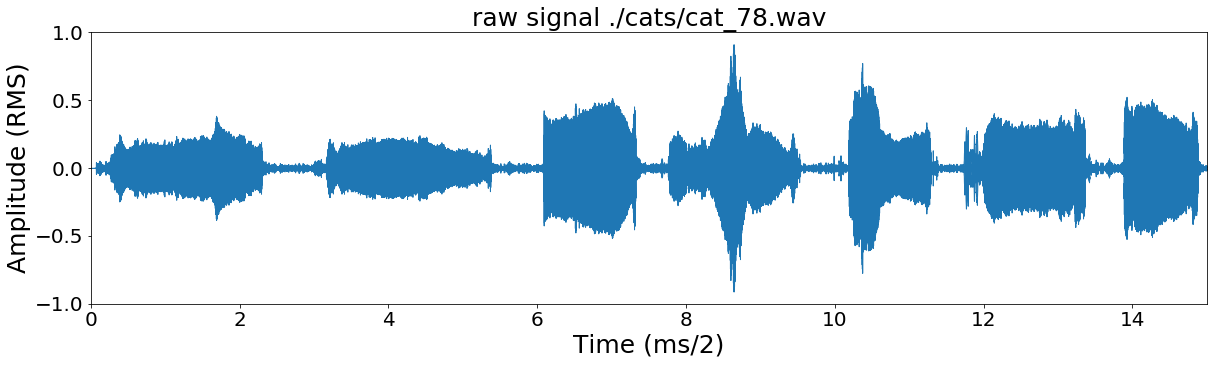

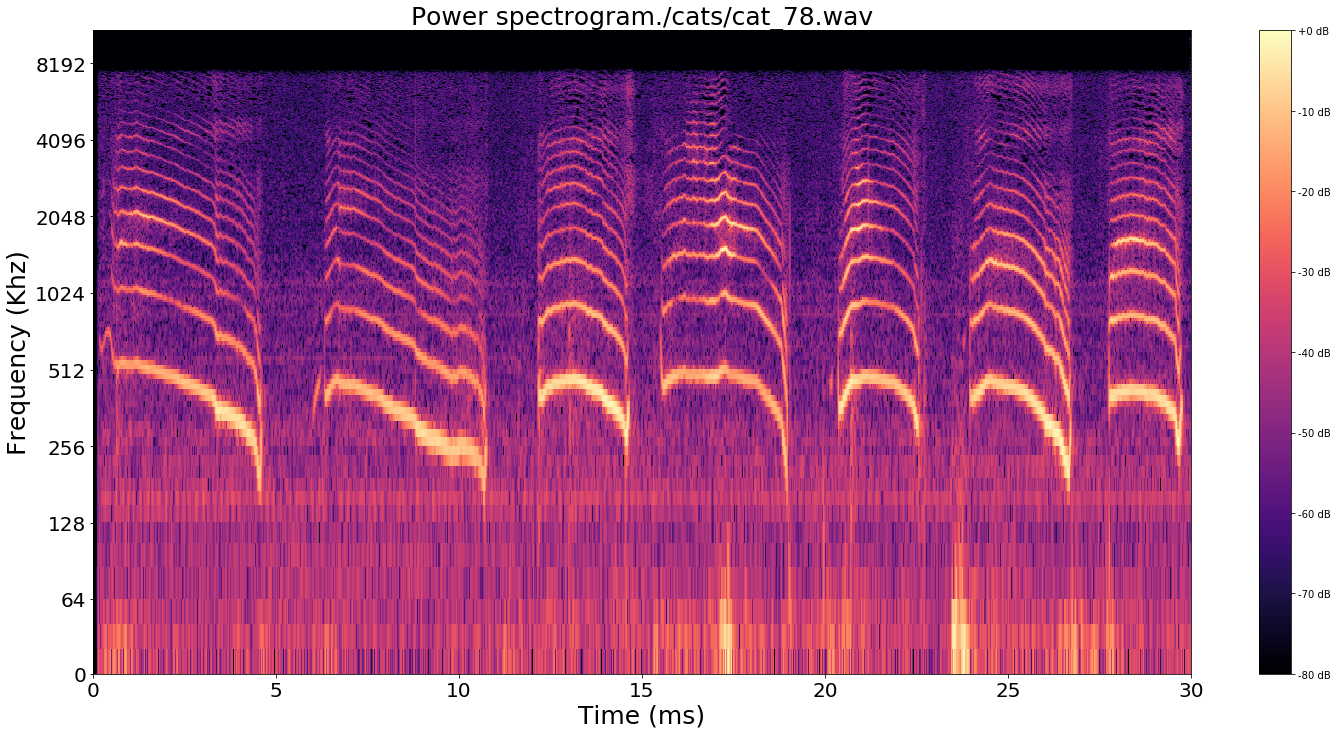

In [128]:
plot_spec('./cats/cat_78.wav')


# a meow from my cat George. nothing special here. 

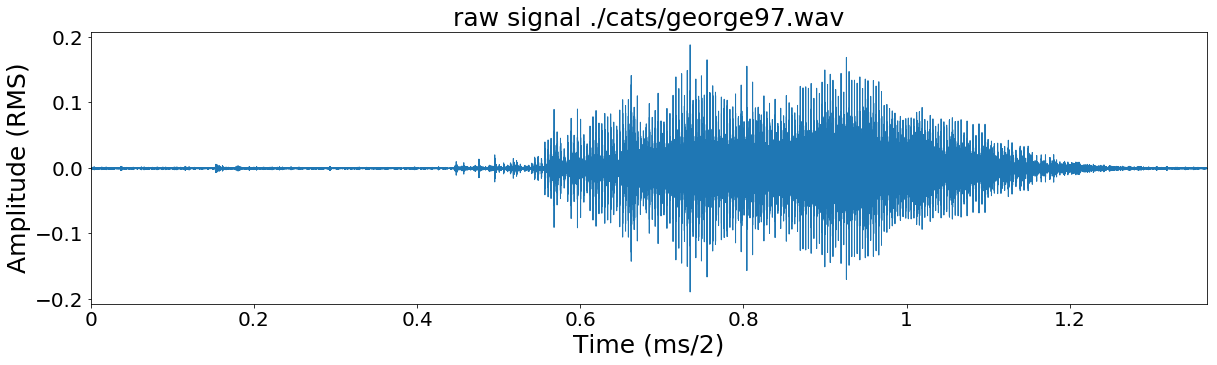

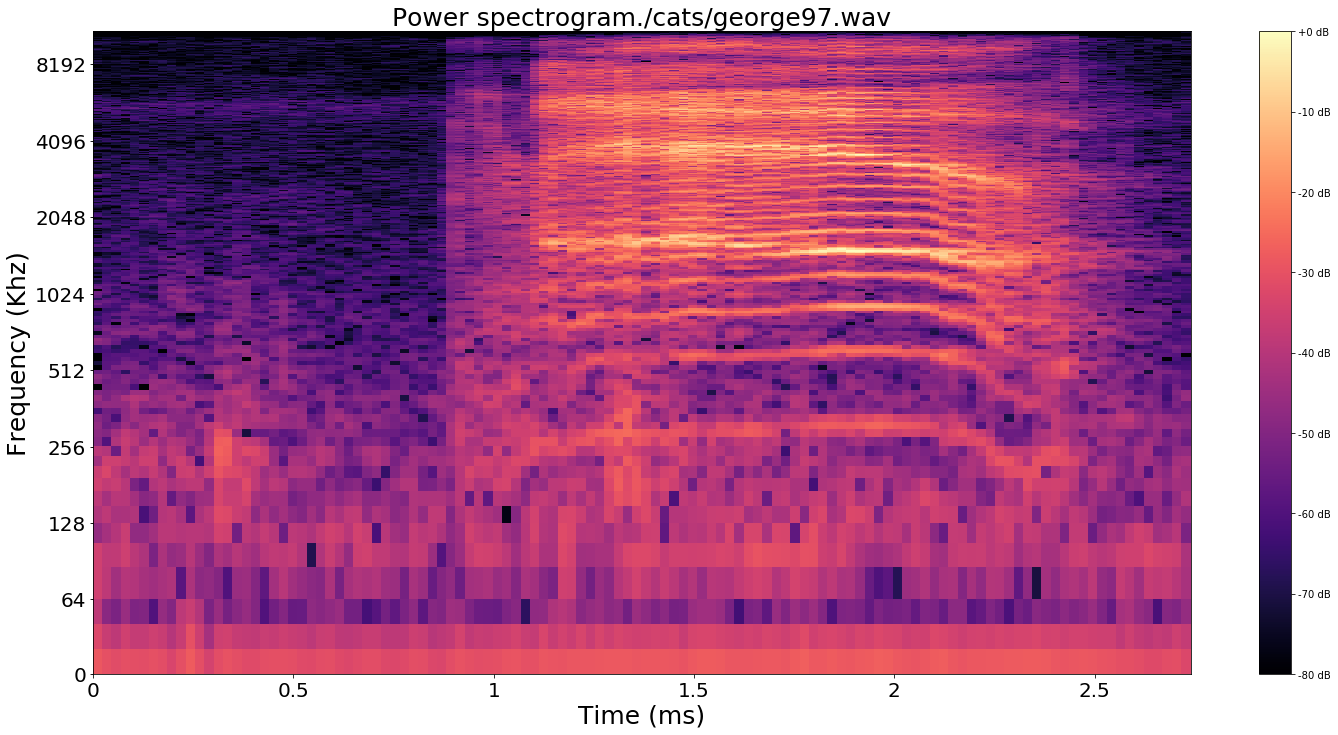

In [129]:
plot_spec('./cats/george97.wav')

# A human meow followed by a cat  meow. Note the differences in the amount of energy present in the lower frequencies and the difference in which frequencies are present. due to differences in physical mechanism generating the sounds.

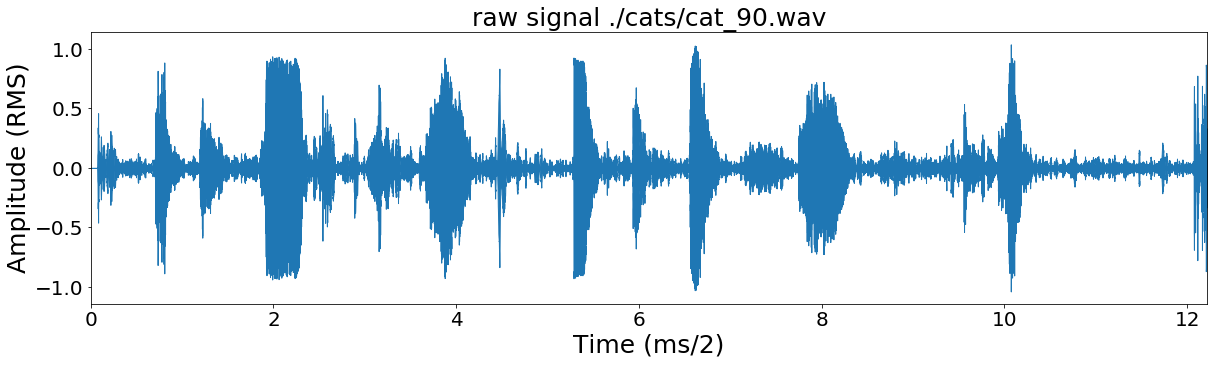

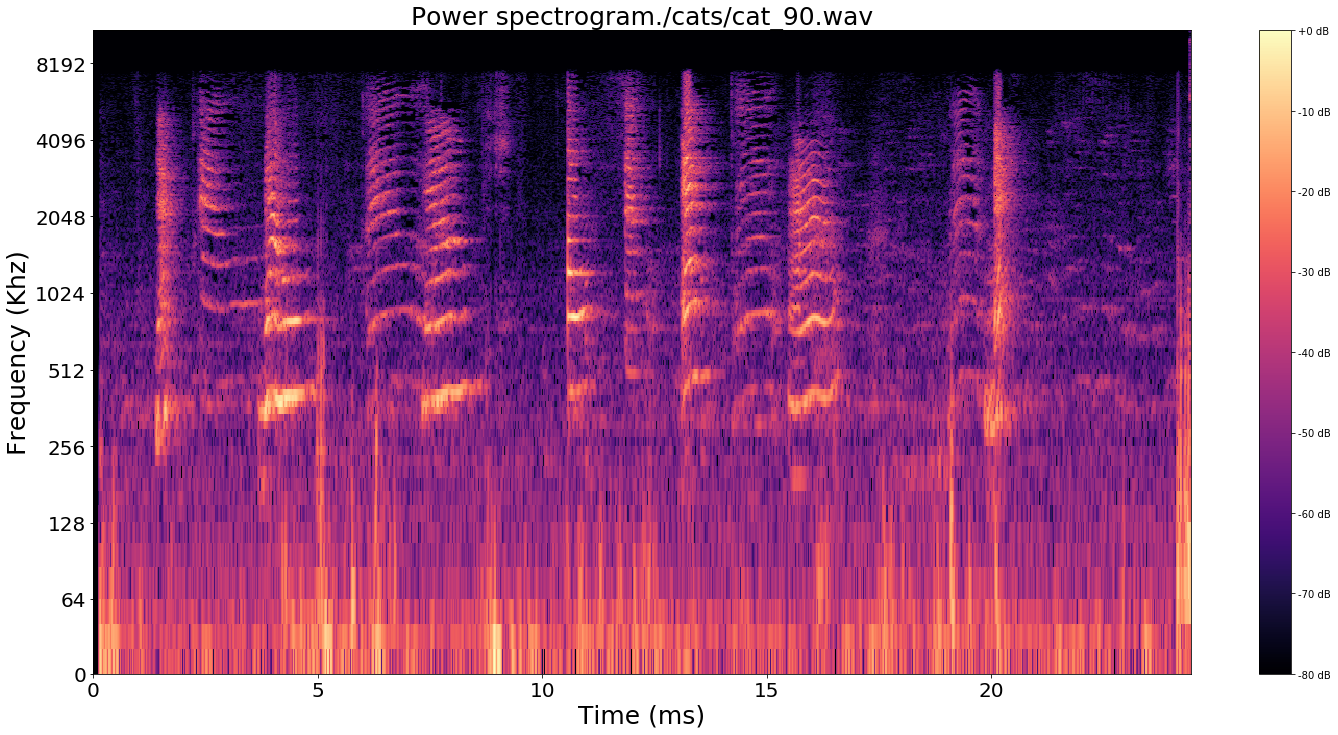

In [130]:
plot_spec('./cats/cat_90.wav')

# 2 meows followed by a purr. not the high power in the low frequencies for the purr.  making the classification task more difficult than cats = high frequencies. This purr might actually be lower than any of the frequencies present in the dog noises, but it is hard to say, as I did not get any files of growling.

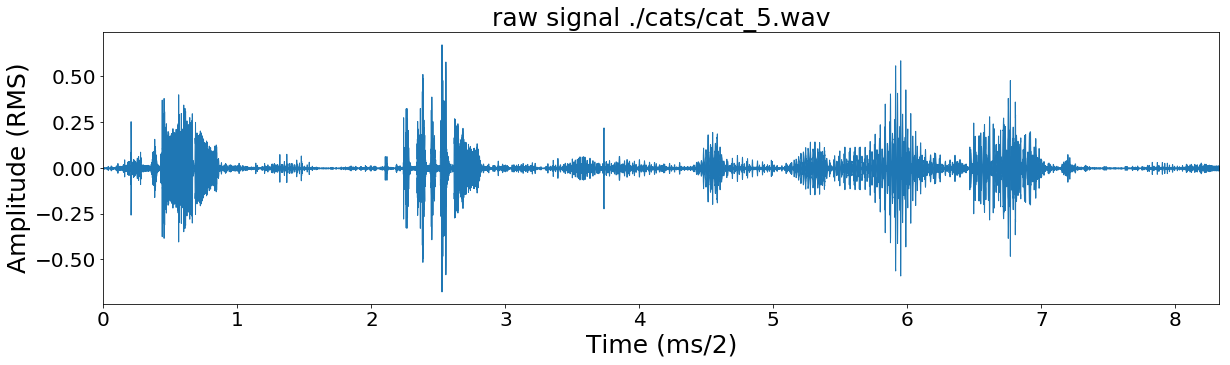

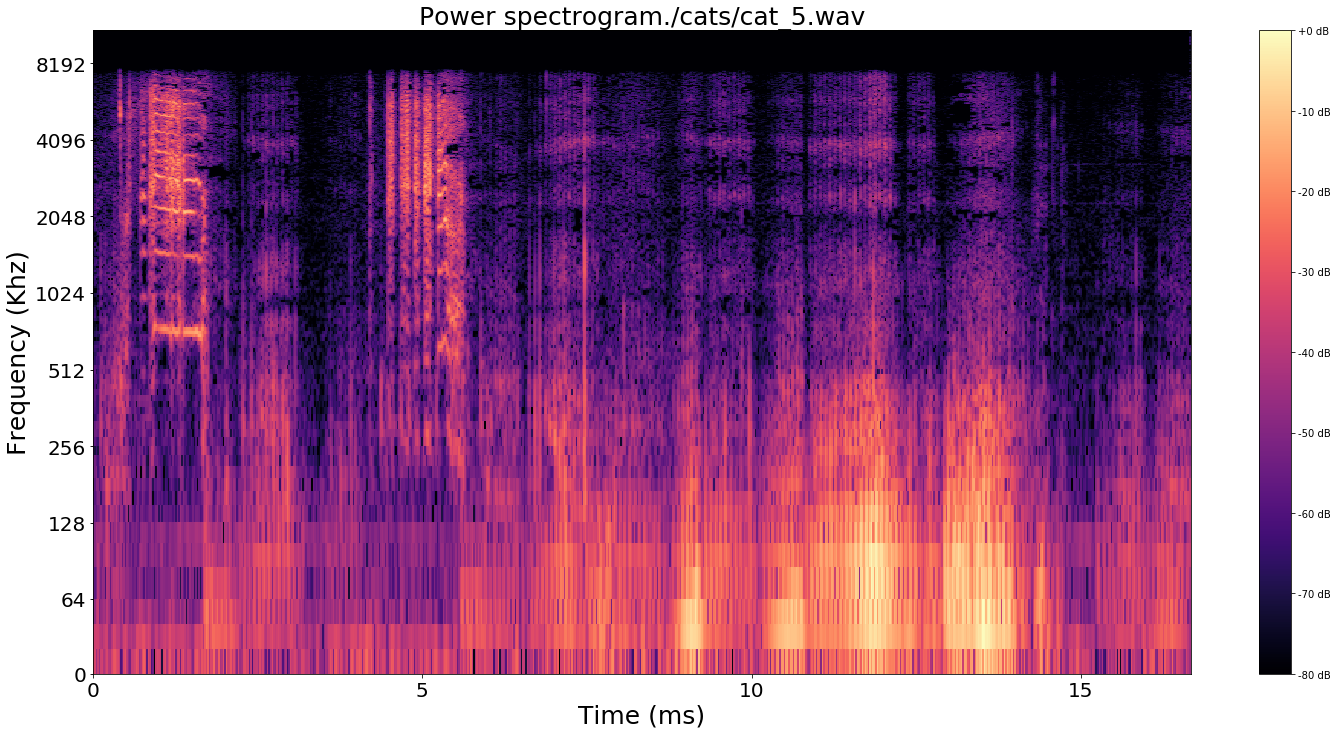

In [131]:
plot_spec('./cats/cat_5.wav')

# a typical medium sized dog barking

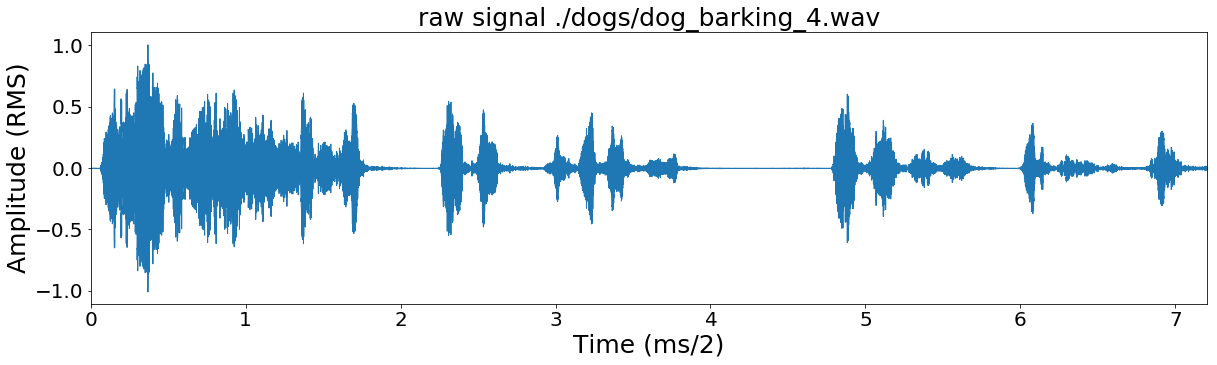

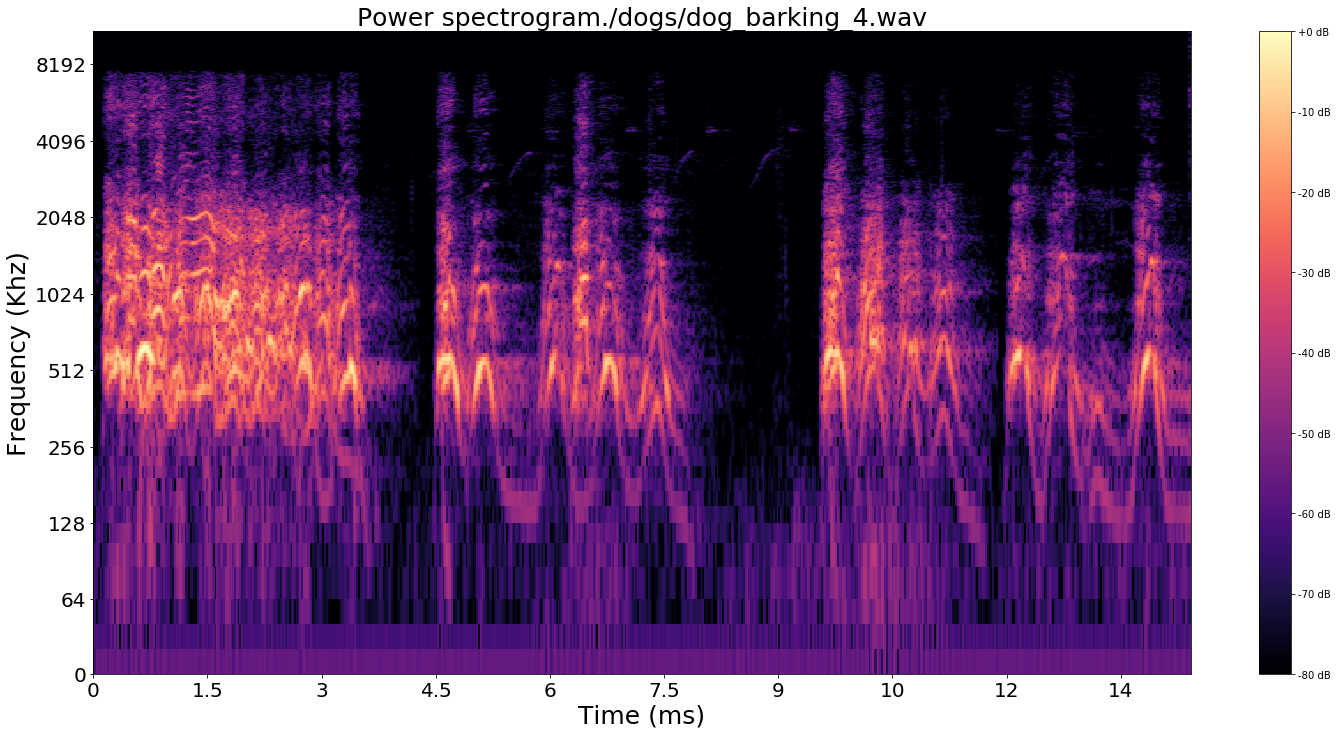

In [132]:
plot_spec('./dogs/dog_barking_4.wav')

# a single dog howl. shows the harmonic structure nicely. note that there are fewer than in the cat meows and the spacing is different (part of what gives them a different timbre).

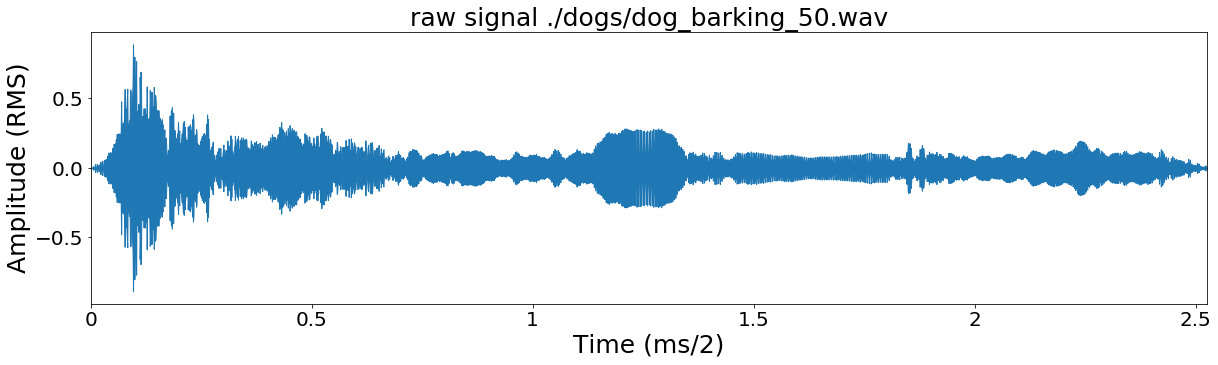

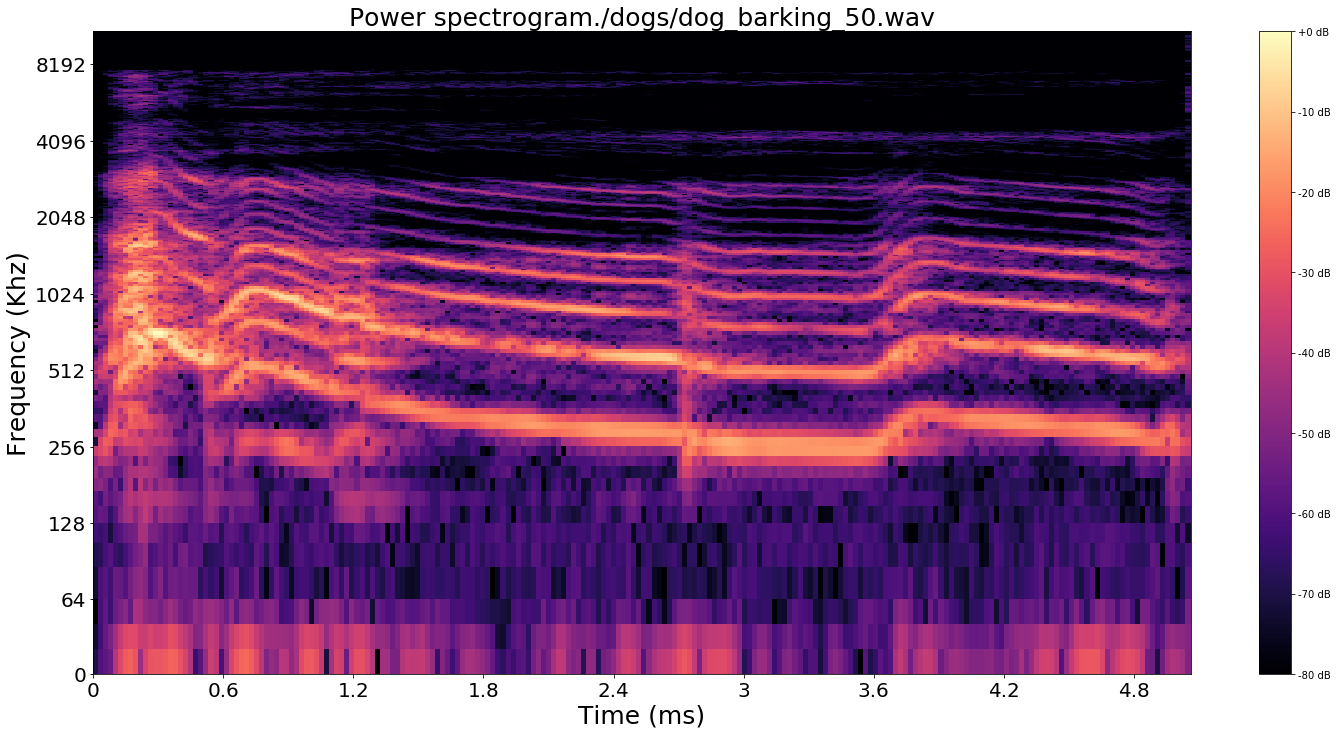

In [133]:
plot_spec('./dogs/dog_barking_50.wav')

# 2 very small sized dogs barking many times. Note that they are at a higher frequency (2048) than the other dogs (512), making the task more difficult than simply cats=higher frequencies.

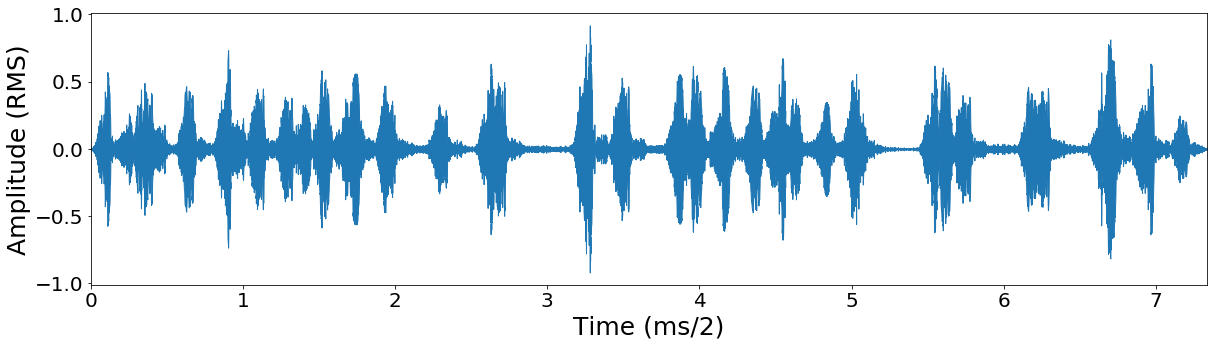

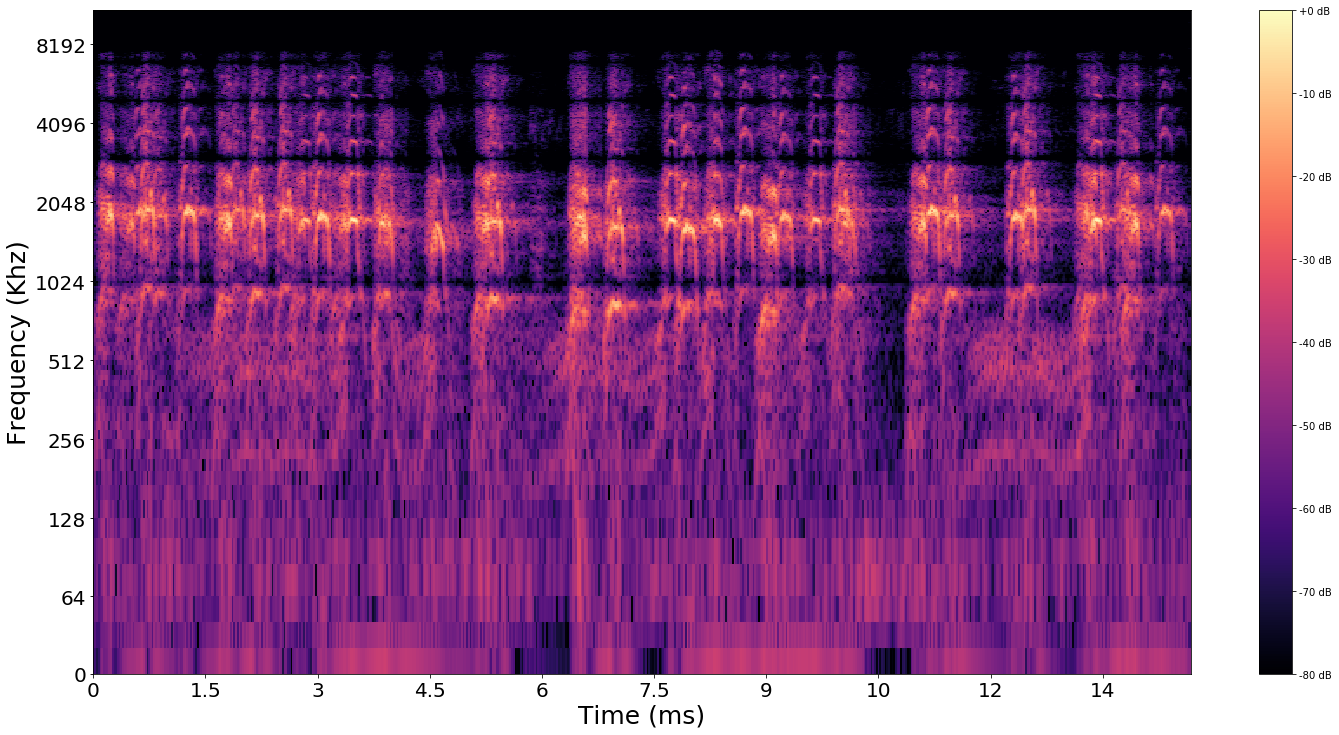

In [112]:
plot_spec('./dogs/dog_barking_94.wav')

# another typical dog bark. 7 times. this one shows the little bit of harmonics that are presnt for the dog sounds

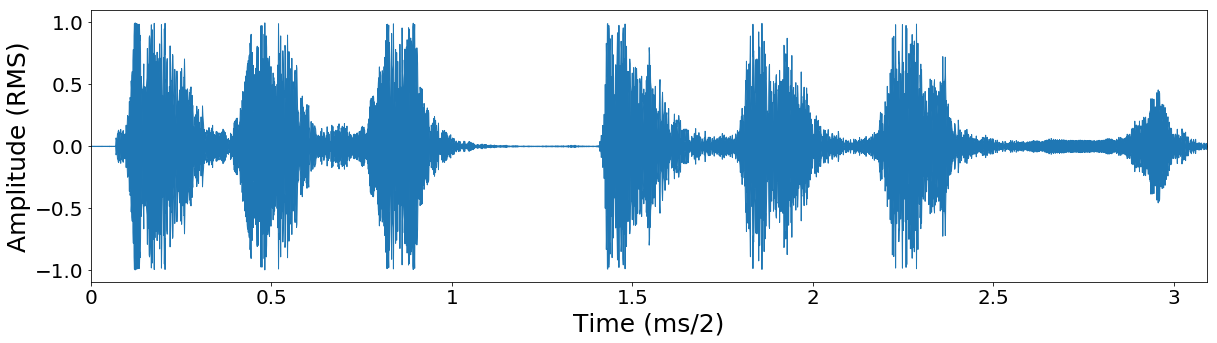

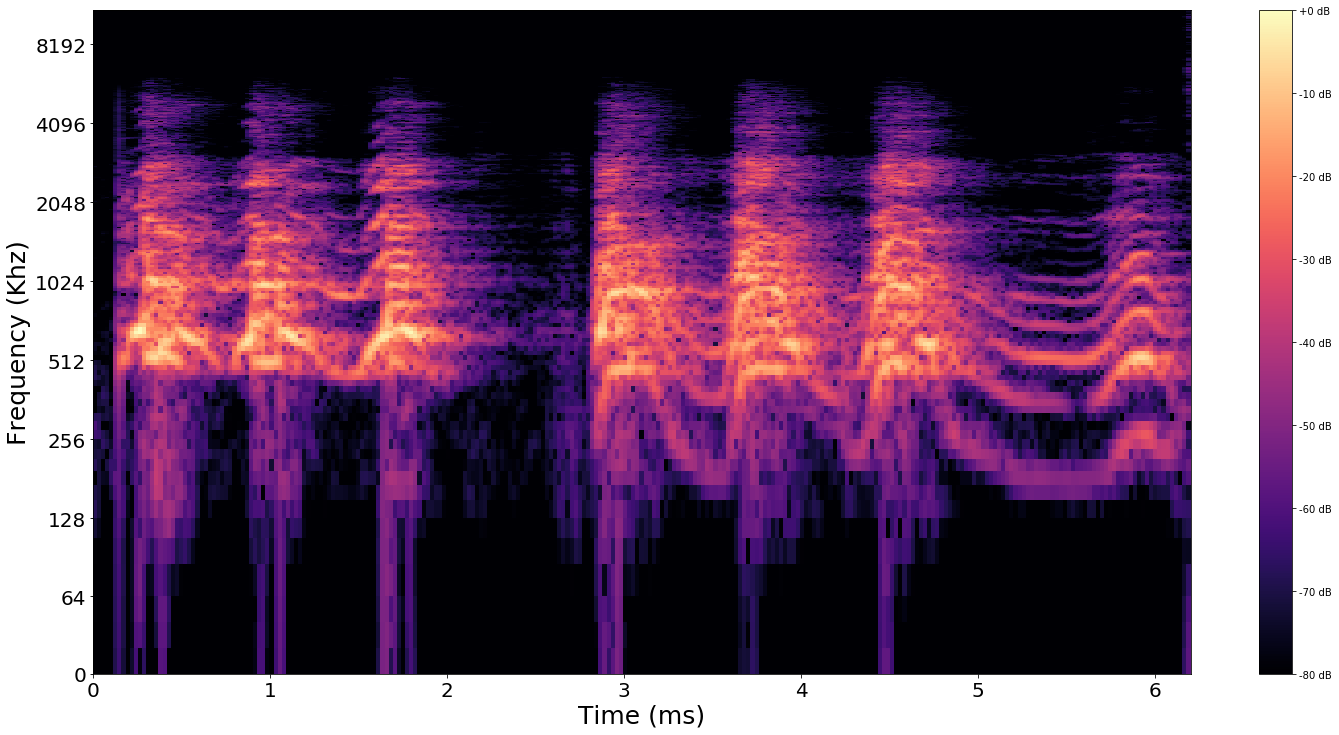

In [109]:
plot_spec('./dogs/dog_barking_17.wav')

# to display spectrogram for a ind. file and customize the length (cut off file)

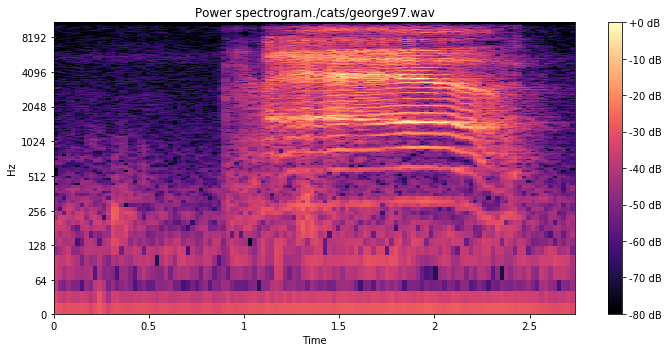

In [122]:
#file = './dogs/dog_barking_94.wav'
file = './cats/george97.wav'


y, sr = librosa.load(file)
# set the length of the array here if file is long
#y= y[:40000 ]
D = librosa.core.stft(y, n_fft=1024)
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5));
librosa.display.specshow(librosa.amplitude_to_db(D,ref=np.max),y_axis='log', x_axis='time')
#librosa.display.waveplot(y, sr=sr)
plt.title('Power spectrogram'+ file)
plt.colorbar(format='%+2.0f dB')
plt.tight_layout()